**Assignment 4**

**Q1:**Discrete FFT and Power Spectrum

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

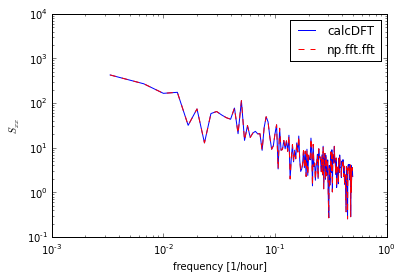

In [3]:
N=300
dcSample = dc[~np.isnan(dc)]
dcSample = dcSample[:N:]
f = np.fft.fftfreq(N)

def calcDFT(x,dt,f):
    t = dt*np.arange(0,len(x))
    T,F=np.meshgrid(t,f)
    E = np.exp(-1j*2*np.pi*T*F)
    X = dt*np.dot(E,x)
    return X, T

fit,ax=plt.subplots(1,1)
X, T = calcDFT(dcSample,1.,f)

dcFFT = np.fft.fft(dcSample)

ax.loglog(f,np.abs(X),label='calcDFT')
ax.loglog(f,np.abs(dcFFT),"r--",label='np.fft.fft')
ax.set_xlabel("frequency [1/hour]");ax.set_ylabel("$S_{xx}$")
ax.legend()


When the canned fft routine is graphed with the manually calulated one, it is seen that they result in the same plot, and therefor give equal results.

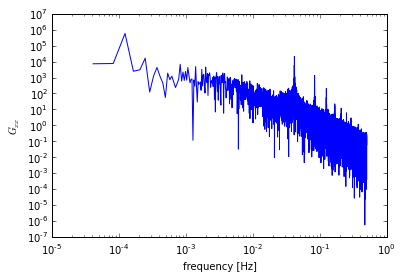

In [7]:
dcSample = dc[~np.isnan(dc)]
N = len(dcSample)
f = np.fft.fftfreq(N,1.)

X = np.fft.fft(dcSample)

Gxx = 2*(X*np.conj(X))/len(X)

fit,ax=plt.subplots(1,1)
ax.loglog(f,np.abs(Gxx))
ax.set_xlabel("frequency [Hz]");ax.set_ylabel("$G_{xx}$")

In [8]:
Rxx0 = np.mean((dcSample-np.mean(dcSample))**2)

var = np.var(dcSample)
print Rxx0,var

36.8172572917 36.8172572917


**Q2:** Emperically derive distribution of spectral estimate

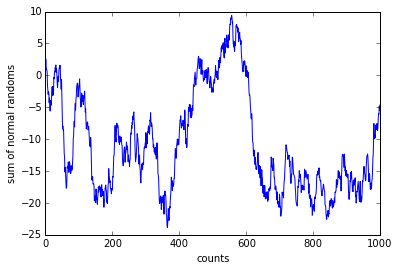

In [9]:
n = 1000
N = np.linspace(0,n-1,n)
def getRed():
    n = 1000
    N = np.linspace(0,n-1,n)
    red = np.zeros(n)
    x = 0
    for ind in range(n):
        x = x + np.random.randn()
        red[ind] = x
    return red
red = getRed()
fit,ax=plt.subplots(1,1)
ax.plot(N,red)
ax.set_xlabel("counts");ax.set_ylabel("sum of normal randoms");ax.set_title("")

/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


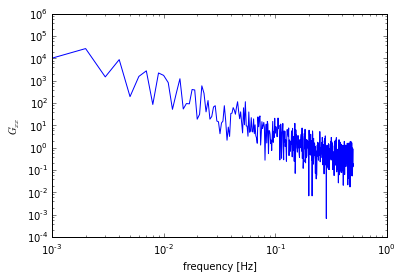

In [10]:
def powerSpectrum(x):
    X = np.fft.fft(x)
    Gxx = 2*(X*np.conj(X))/len(X)
    f = np.fft.fftfreq(len(x),1.)
    return Gxx, f

Gxx, f = powerSpectrum(red)

fit,ax=plt.subplots(1,1)
ax.loglog(f,Gxx)
ax.set_xlabel("frequency [Hz]");ax.set_ylabel("$G_{xx}$")

/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


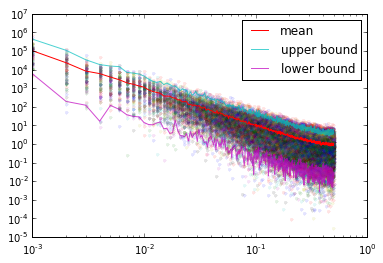

In [11]:
nn = 100
Gxs = np.ndarray((nn,len(N)))
fit,ax=plt.subplots(1,1)
for ind in range(nn):
    red = np.real(getRed())
    gxs, f = powerSpectrum(red)
    Gxs[ind,:] = gxs
    ax.loglog(f,np.real(gxs),'.',alpha=0.1)

#plots the mean of the data
mean = np.zeros(len(N))
for ind2 in range(len(N)):
    gsum = 0
    for ind1 in range(nn):
        gsum = gsum+(Gxs[ind1,ind2])
        mean[ind2] = gsum/nn        
ax.loglog(f,mean,label="mean")

for ind in range(len(N)):
    Gxs[:,ind] = np.sort(Gxs[:,ind])
    
ax.loglog(f,Gxs[int(0.975*nn),:],label='upper bound',alpha=0.7)
ax.loglog(f,Gxs[int(0.025*nn),:],label='lower bound',alpha=0.7)

ax.legend()

In [12]:
inter = stats.chi2.interval(0.95,df=2)
upper = np.mean(Gxs[int(0.975*nn),:])
lower = np.mean(Gxs[int(0.025*nn),:])
ratio = upper/lower
chiRatio = inter[1]/inter[0]
print ratio," ",chiRatio

328.856962647   145.702955659


The values of the ratios are of the same order of magnitude, but still off by quite a bit.